# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [48]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [49]:
# read the data
df = pd.read_csv('/content/foodhub_order.csv')
# returns the first 5 rows of the dataframe
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

* The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.
* The column day of the week is designted with Weekday and Weekend which represented Monday to Friday and Saturday & Sunday respectively.
* The columns Order_id, Customer_id, Cost_of_the_order, Food_prepration_time and Delivery_time are numerical in nature.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [50]:
# The shape() is used to get the number of rows and columns of the dataset
df.shape

(1898, 9)

#### Observations:
* There are 1898 **rows** and 9 **columns** in the dataset.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [51]:
# The info() is used to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
* The order_id, customer_id, food_preparation_time, and delivery_time are integer data-type
* The restautant_name, cuisine_type, day_of_the_week, and rating are object data-type.
* It is only cost_of_the_order that is a float data-type
* All the columns have 1898 observations, which means none of the columns has null values
The dataset consumed 133.6+ KB memory usage.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [52]:
# checking missing values across each columns
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
* There are no missing values in the dataset, hence no need of treating them


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [53]:
# The describe() is used to get the statistical summary of the dataset
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [54]:
# In order to make the statistical summary easier to read, the describe() is transposed
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
* The Average cost_of_the_order is 1.65, with median cost being 14.14, and ranges from 4.47 - 35.41
* The average food-preparation_time is 2.74 (mins),with median time being 27 mins, and ranges from 20-35 mins
* The Average order delivery time is 2.42 mins, with median time being 25 mins and ranges between 15-33 mins. 
* Since order_id and customer_id are both unique identifier of the order number and registered customers who have ordered for food respectively, interpreting its statistic summary won't yield meaningful insights.
* **The minimum, average and maximum time it takes food to be prepared once an order is placed is 20 mins, 2.74 mins and 35 mins respectively.**

### **Question 5:** How many orders are not rated? [1 mark]

In [55]:
# checking orders that are not rated
df.rating.unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [56]:
df.rating.value_counts(normalize=False)

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
* **It can be observed that there are 4 unique rating in the dataset with 736 orders are not rated which is represented as Not given**

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

##### Observation on Order ID

In [57]:
# Number of unique order ID
df.order_id.nunique()

1898

* **There are 1898 unique Order ID**

#### Observation on Customer ID

In [58]:
# Number of unique customer ID
df.customer_id.nunique()

1200

* **There are 1200 unique Customer ID**

#### Observation on Restaurant Name

In [59]:
# Number of unique Restaurant Name
df.restaurant_name.nunique()

178

* **There are 178 unique Restaurant Name***

#### Observation on Cuisine Type

In [60]:
# Number of unique Cuisine Type
df.cuisine_type.nunique()

14

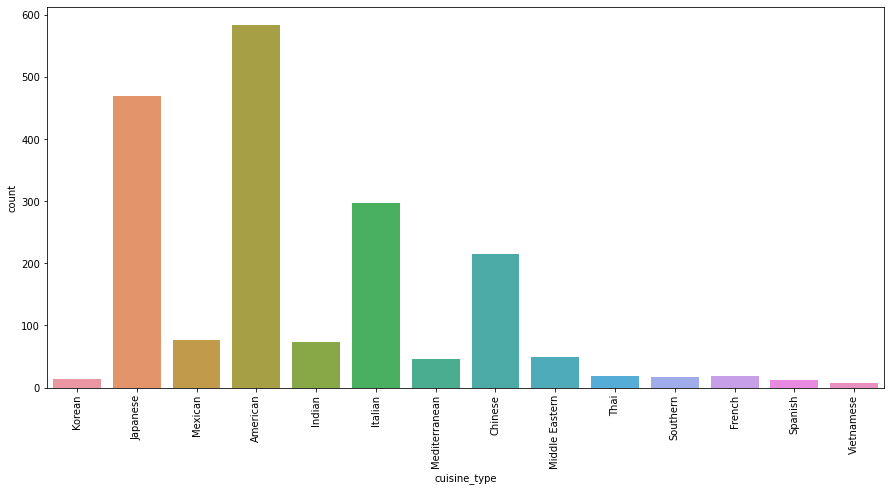

In [61]:
plt.figure(figsize = (15,7))
sns.countplot(data=df,x='cuisine_type')
plt.xticks(rotation=90);

* **There are 14 unique cuisine types**
* **The cuisine with highest order are American, followed by japanese, Italian, Chinese, while Mexican and Indian cuisine have almost equal number of order**
* **The cuisine with lowest order is vetnamese**  

#### Observation on Cost of the Order

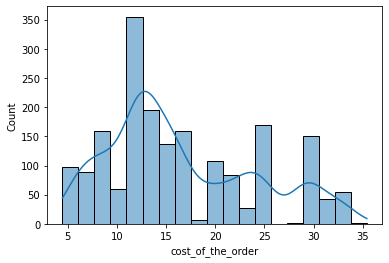

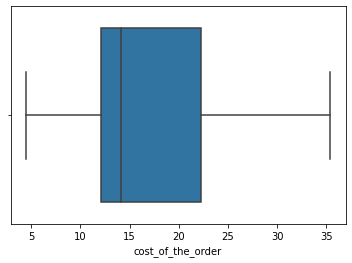

In [62]:
sns.histplot(data=df,x='cost_of_the_order', kde= True)
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

* **Cost of order is fairly skew to the right**
* **The median value for cost of order is around$15, the Q1 and Q3 are around 13 and 23 respectively**
* **The minimum value is 5and maximum value being 35 without any outliers**

#### Observation on Day of the Week

In [63]:
# Number of unique value for Day of the Week
df.day_of_the_week.nunique()

2

In [ ]:
sns.countplot(data=df,x='day_of_the_week')
plt.show()

* **There are more order during the weekend than weekdays**

#### Observation on Rating

In [64]:
# Number of unique Rating
df.rating.nunique()

4

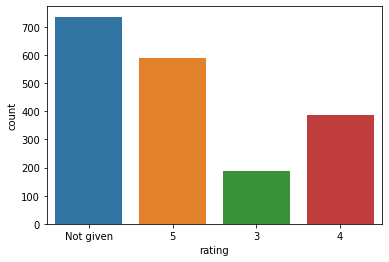

In [65]:
sns.countplot(data=df,x='rating')
plt.show()

* **About 600 customers gave 5* rating, 400 gave 4* rating, 200 gave 3* rating while over 700 customers did not give any rating**

#### Observation on Food Preparation Time

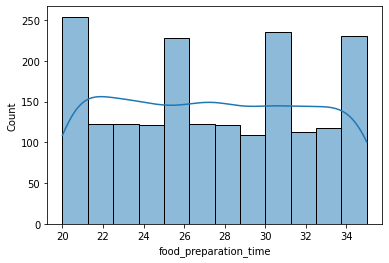

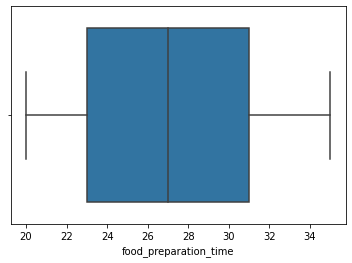

In [66]:
sns.histplot(data=df,x='food_preparation_time', kde= True)
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

* **The food preparation time seems to have a uniform distribution**
* **The median value is 27 mins, minimum value is 20 mins and maximum value being 34 mins without any outliers** 

#### Observation on Delivery Time

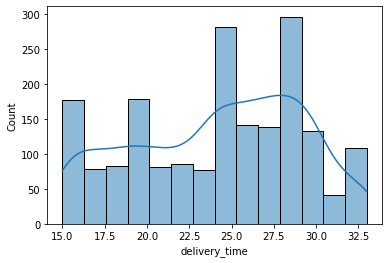

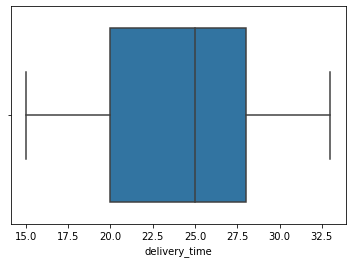

In [67]:
sns.histplot(data=df,x='delivery_time', kde= True)
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()

* **The delivery timealso  seems to have a uniform distribution**
* **The median value is 25 mins, minimum value is 15 mins and maximum value being 32.5 mins without any outliers**

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [68]:
# Top 5 restaurants with highest number of orders
df.restaurant_name.nunique()

178

In [69]:
df.restaurant_name.value_counts(normalize=False)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

* The 5 restaurants with highest orders are Shake Shack being, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [70]:
# Most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].mode()

0    American
dtype: object

#### Observations:
* **The most popular cuisine type during the weekend is American cuisine**


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [71]:
# Orders that cost above $20
df_greater_than_20 = df[df['cost_of_the_order']>20] 
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

The number of total orders that cost above 20 dollars is: 555


In [72]:
# Percentage of orders that cost above $20
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100
print("Percentage of orders above $20 is:", round(percentage, 2), '%')

Percentage of orders above $20 is: 29.24 %


#### Observations:
* **The total number of orders that cost more than $20 is 555 and its percentage is 29.44%**


### **Question 10**: What is the mean order delivery time? [1 mark]

In [73]:
# The Mean delivery time
mean_del_time = df['delivery_time'].mean()
print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


#### Observations:
* **The mean/average delivery time is 24.16 minutes**


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [74]:
# Counts of each customer_id
df.customer_id.value_counts().head()

52832     13
47440     10
83287      9
250494     8
259341     7
Name: customer_id, dtype: int64

In [75]:
# The top 3 most frequent customers
df.customer_id.value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
* **The top 3 most frequent Customers that qualify for the 20% discount are customer_ID 52832, 47440 and 83287 with 13, 10 and 9 orders respectively**

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### Cuisine vs Cost of the Order

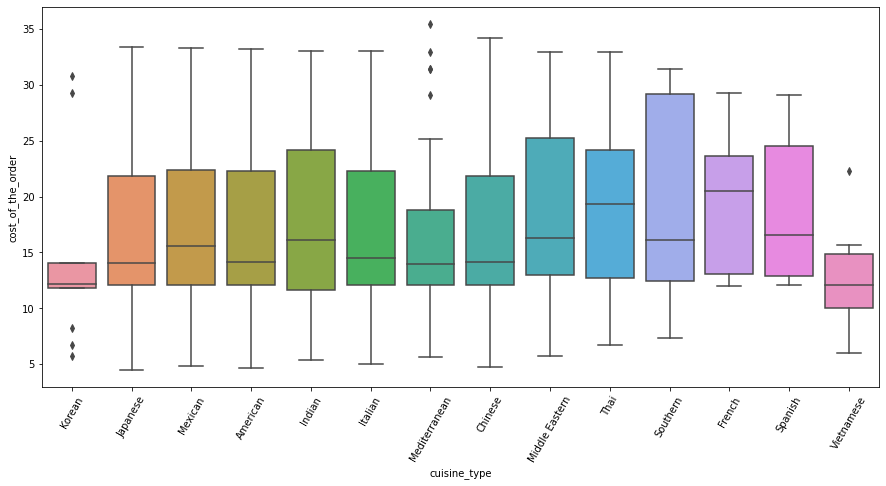

In [76]:
# Relationship between cuisine type and cost of the order
plt.figure(figsize=(15,7))
sns.boxplot(data = df, x = "cuisine_type", y = "cost_of_the_order")
plt.xticks(rotation = 60)
plt.show()

* **The Korean cuisine has the lowest cost of order with some outliers while the chinese cuisine type has the highest cost of order**

#### Cuisine vs Food Preparation Time

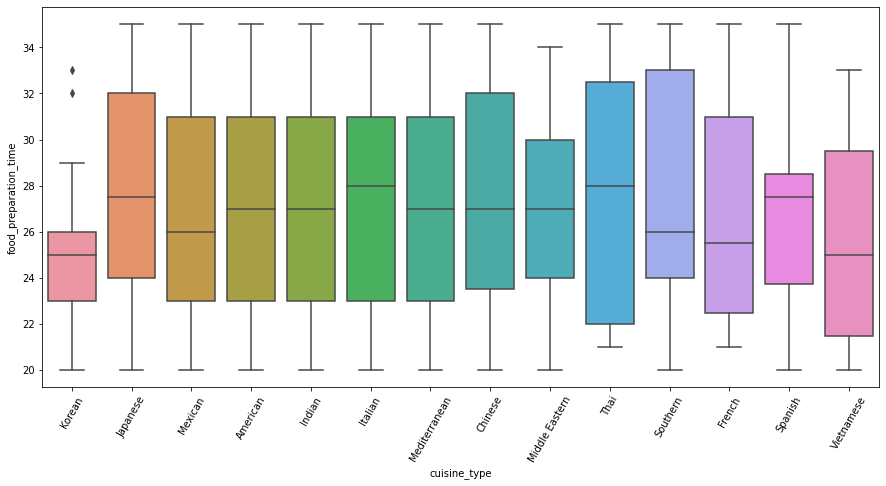

In [77]:
# Relationship between cuisine type and food preparation time
plt.figure(figsize=(15,7))
sns.boxplot(data = df, x = "cuisine_type", y = "food_preparation_time")
plt.xticks(rotation = 60)
plt.show()

* **The korean cuisine type is the least ordered cuisine type basd on food preparation time with some outliers**

#### Day of the Week vs Delivery Time

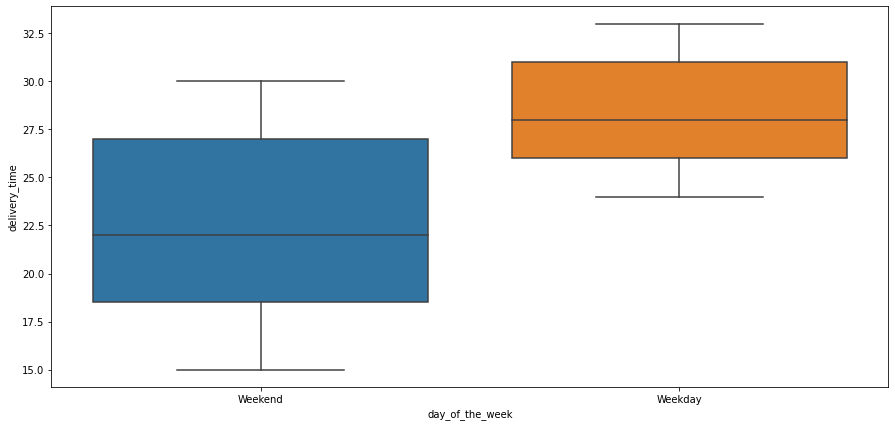

In [78]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(data = df, x = "day_of_the_week", y = "delivery_time")
plt.show()

* **The minimum, median and maximum delivery time during the weekend is 15, 22.5 and 30 minutes respectively**
* **The minimum, median and maximum delivery time during the weekdays is 25, 27.5 and 32.5 minutes respectively**
* **It can be deduced that the delivery time during the weekday is higher than the weekend**

#### Rating vs Cost of the order 

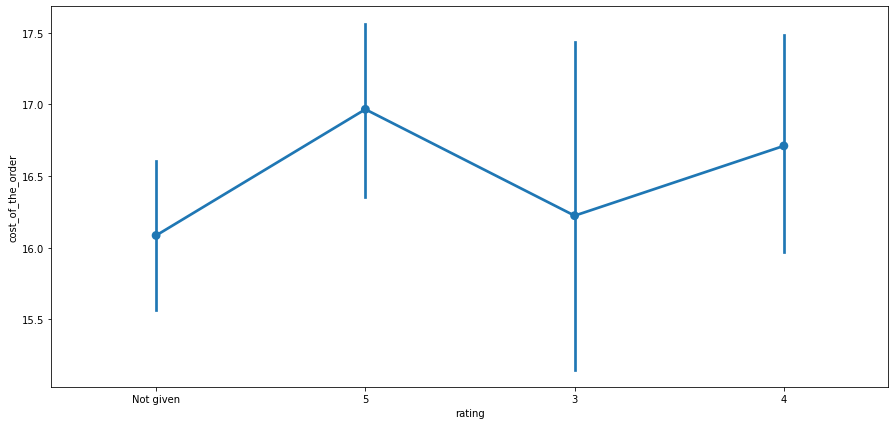

In [79]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(data = df, x = "rating", y = "cost_of_the_order")
plt.show()

* **It can be observed that the rating given by the customer increases when the cost of the order increases**

#### Rating vs Food Preparation Time

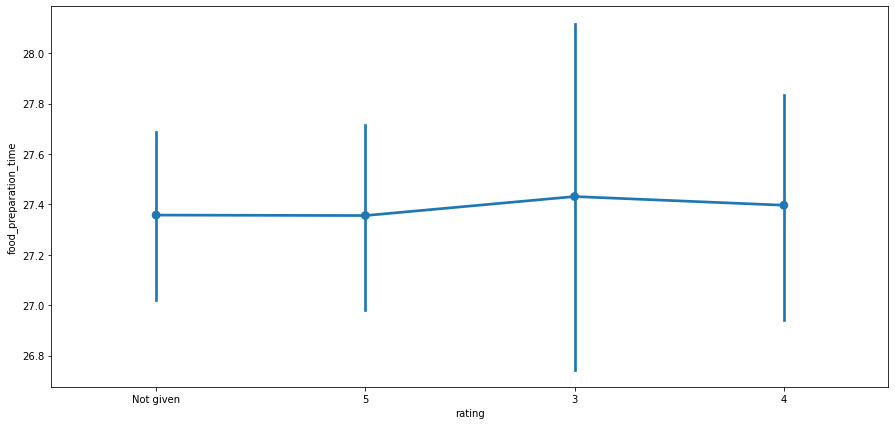

In [80]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(data = df, x = "rating", y = "food_preparation_time")
plt.show()

* **There is no difference in the rating given by the customer as the food preparation time has always been constant around 27.4 minutes**

#### Rating vs Delivery Time

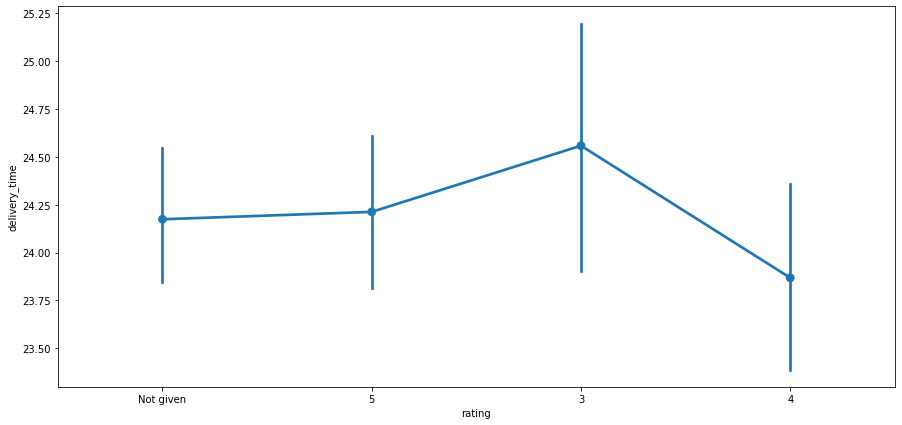

In [81]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

* **It can be observed that there has been a decline in the rating given by the customer when the delivery time increrases to 24.50 minutes**
* **Customer give better rating when the delivery time is short**

#### Correlation Among variables



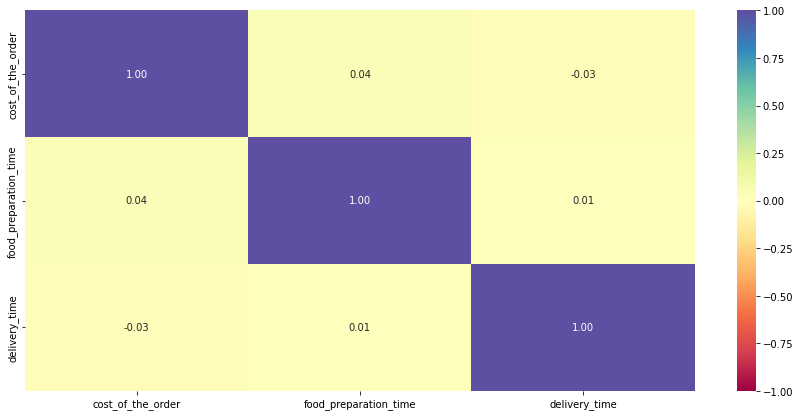

In [82]:
# The Heatmap Plot is used to get correlation among the numerical variables 
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* **There is little or no negative correlation between cost of the order and delivery time**
* **There is little or no positive correlation between cost of the order and food preparation time**
* **There seems not to be any relationship between food preparation time and delivery time**

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [83]:
# Filtering the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')  

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [ ]:
# The restaurant names that have rating count more than 50
rest_names = df_rating_count['rating']['restaurant_name']

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Grouping the restaurant names with their ratings to find the mean rating of each restaurant
df_mean_4.groupby([''])[''].mean().sort_values(ascending = False).reset_index().dropna()

#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [84]:
# Conditional statement for each category is first created with revenue generated forn each condition
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [85]:
# Taking summation of the revenue column will give the total revenue
total_rev = df['Revenue'].sum()
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


#### Observations:
* **The total revenue generated by the company across all order is $6166.3**

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [86]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Delivery time above 60 minutes
df_greater_than_60 = df[df['total_time']>60] 
print('The total delivery time above 60 minutes is:', df_greater_than_60.shape[0])

The total delivery time above 60 minutes is: 200


In [87]:
# Percentage of orders that take above 60 minutes
percentage = (df_greater_than_60.shape[0] / df.shape[0]) * 100
print("Percentage of orders that more than 60 minutes is:", round(percentage, 2), '%')

Percentage of orders that more than 60 minutes is: 10.54 %


#### Observations:
* **The total number of orders that take more than 60 minutes is 200 and its percentage is 10.54%**

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [88]:
# The mean delivery time on weekdays
print('The mean delivery time on weekdays is around', 
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekdays is around 28 minutes


In [89]:
# The mean delivery time on weekend
print('The mean delivery time on weekdays is around', 
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekdays is around 22 minutes


#### Observations:
* **There is slight variation between the mean delivery time on weekdays and weekend with a difference of 6 minutes**

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  It can be concluded that American cuisne type is the most ordered cuisine both on weekdays and weekend
* The Korean cuisine type has the lowest cost of order with while the chinese cuisine type has the highest cost of order
* The delivery time during the weekday is higher than the weekend
It can be observed that the rating given by the customer increases when the cost of the order increases
* The There seems not to be any relationship between food preparation time and delivery time
* Customer give a higher rating when the delivery time is short

### Recommendations:

* The food aggregator can have more patronage when the delivery time is short as customers give a higher rating whenn food delivery time is short
* The korean cuisine type is the least demanded order while the American cuisne type is most the demanded cuisne type, the comapny can increase her productivity when focus more on the cuisine type that is most demanded through improving on customer experience thereby generating more revenue.

---